In [1]:
def load(
        filename="2021-01-06-published-sars-cov2-tcell-epitopes-corrected-protein-names.csv",
        assays={"AIM", "IFN-γ ELISpot", "MIRA", "T-Scan", "pMHC Multimer"},
        species="Human",
        exposure="infection"):
    df = pd.read_csv(filename)
    n_total = len(df)
    print("Loaded %d rows (%d studies) from %s" % (n_total, len(df.Source.unique()), filename))
    df = df[df.Species.str.lower() == species.lower()]
    print("Kept %d/%d rows (%d studies) with species = %s" % (len(df), n_total, len(df.Source.unique()), species))
    df = df[df.Exposure.str.lower() == exposure.lower()]
    print("Kept %d/%d rows (%d studies) with exposure = %s" % (len(df), n_total, len(df.Source.unique()), exposure))
    lower_assays = {assay_name.lower() for assay_name in assays}
    assay_mask = df.Assay.str.lower().isin(lower_assays)
    assays_not_kept = df[~assay_mask].Assay.unique()
    df = df[assay_mask]
    print("Kept %d/%d rows (%d studies) with valid assay, dropping assays: %s" % (
        len(df),
        n_total, 
        len(df.Source.unique()),
        assays_not_kept))
    no_percent_responding = df["% Responding"].isnull()
    df = df[~no_percent_responding]
    print("Kept %d/%d rows (%d studies) with data for '%% Responding'" % (
        len(df),
        n_total, 
        len(df.Source.unique())))
    
    return df

In [2]:
df = load()

Loaded 973 rows (12 studies) from 2021-01-06-published-sars-cov2-tcell-epitopes-corrected-protein-names.csv
Kept 958/973 rows (10 studies) with species = Human
Kept 958/973 rows (10 studies) with exposure = infection
Kept 954/973 rows (8 studies) with valid assay, dropping assays: ['Single chain trimer' 'TCR-seq']
Kept 949/973 rows (8 studies) with data for '% Responding'


In [3]:
df.Source.value_counts()

Tarke          803
Peng            41
Schulien        36
Ferretti        29
Nelde           17
Shomuradova     13
Le Bert          8
Snyder           2
Name: Source, dtype: int64

In [4]:
studies = sorted(df.Source.unique())

In [5]:
df["# Responding"].value_counts()

1.0     678
2.0     132
3.0      55
4.0      23
5.0      17
6.0       8
7.0       7
10.0      5
8.0       4
12.0      4
0.0       3
11.0      3
9.0       3
13.0      2
16.0      2
14.0      1
17.0      1
21.0      1
Name: # Responding, dtype: int64

In [6]:
from collections import Counter
epitope_to_study_count = Counter()
epitope_to_study_count_10aa = Counter()
epitope_to_study_count_20aa = Counter()
epitope_to_study_count_30aa = Counter()

for prot, start, end in zip(df.Protein, df.Start, df.End):
    epitope_to_study_count["%s %d-%d" % (prot, start, end)] += 1
    epitope_to_study_count_10aa["%s %d" % (prot, (start // 10) * 10)] += 1
    epitope_to_study_count_20aa["%s %d" % (prot, (start // 20) * 20)] += 1
    epitope_to_study_count_30aa["%s %d" % (prot, (start // 30) * 30)] += 1
    

In [7]:
epitope_20aa_to_study_to_percent = {}
for prot, start, source, prct in zip(df.Protein, df.Start, df.Source, df["% Responding"]):
    epitope = "%s %d" % (prot, (start // 20) * 20)
    if epitope not in epitope_20aa_to_study_to_percent:
        epitope_20aa_to_study_to_percent[epitope] = {}
    epitope_20aa_to_study_to_percent[epitope][source] = prct
    

In [8]:
epitope_20aa_to_study_to_percent

{'nsp7 20': {'Ferretti': 0.8888888888888888, 'Le Bert': 0.14285714285714285},
 'S 260': {'Ferretti': 0.7777777777777778,
  'Shomuradova': 0.9285714285714286,
  'Tarke': 0.25},
 'ORF3a 120': {'Ferretti': 0.8888888888888888,
  'Schulien': 1.0,
  'Tarke': 0.07142857142857142},
 'nsp8 140': {'Ferretti': 0.6},
 'N 220': {'Ferretti': 0.2222222222222222,
  'Nelde': 0.6363636363636364,
  'Schulien': 0.2727272727272727,
  'Tarke': 0.07142857142857142},
 'nsp3 80': {'Ferretti': 0.3333333333333333},
 'ORF3a 200': {'Ferretti': 1.0,
  'Peng': 0.09523809523809523,
  'Schulien': 0.8333333333333334,
  'Tarke': 0.08333333333333333},
 'nsp3 800': {'Ferretti': 1.0,
  'Nelde': 0.8333333333333334,
  'Snyder': 0.8333333333333334,
  'Tarke': 0.09090909090909093},
 'nsp3 500': {'Ferretti': 0.8, 'Tarke': 0.6666666666666666},
 'M 160': {'Ferretti': 0.6,
  'Nelde': 0.9545454545454546,
  'Peng': 0.3809523809523809,
  'Tarke': 0.15384615384615385},
 'nsp9 20': {'Ferretti': 1.0, 'Schulien': 0.5},
 'nsp12 720': {'Fe

In [9]:
epitope_to_study_count_20aa.most_common()

[('N 300', 15),
 ('N 320', 15),
 ('M 160', 14),
 ('N 100', 13),
 ('S 680', 12),
 ('S 20', 12),
 ('S 1200', 11),
 ('S 700', 11),
 ('M 180', 11),
 ('nsp3 800', 10),
 ('S 200', 10),
 ('S 340', 10),
 ('S 440', 10),
 ('S 860', 10),
 ('M 120', 10),
 ('S 360', 9),
 ('N 120', 9),
 ('ORF3a 100', 9),
 ('S 220', 9),
 ('S 160', 9),
 ('nsp3 1500', 9),
 ('S 320', 9),
 ('S 80', 9),
 ('ORF3a 200', 8),
 ('N 360', 8),
 ('M 140', 8),
 ('nsp3 1360', 8),
 ('S 620', 8),
 ('S 880', 8),
 ('M 80', 8),
 ('S 260', 7),
 ('ORF3a 120', 7),
 ('N 40', 7),
 ('N 80', 7),
 ('N 260', 7),
 ('S 180', 7),
 ('S 1180', 7),
 ('S 820', 7),
 ('S 1000', 7),
 ('S 1040', 7),
 ('M 60', 7),
 ('M 100', 7),
 ('S 1080', 7),
 ('nsp3 820', 7),
 ('M 20', 7),
 ('N 220', 6),
 ('N 280', 6),
 ('M 40', 6),
 ('S 500', 6),
 ('S 740', 6),
 ('N 0', 6),
 ('N 60', 6),
 ('S 140', 6),
 ('nsp3 1760', 6),
 ('S 100', 6),
 ('ORF3a 80', 6),
 ('nsp3 1120', 6),
 ('S 800', 5),
 ('N 340', 5),
 ('ORF3a 140', 5),
 ('ORF3a 220', 5),
 ('N 240', 5),
 ('S 980', 5),
 

In [334]:
latex_header = r"""
\documentclass{article}
\usepackage{amsmath}
\usepackage{array}
\usepackage{booktabs}
\usepackage{fullpage}
\usepackage{graphicx}
\usepackage{threeparttable}
\usepackage{wasysym}
\usepackage{array}
\usepackage{stackengine}
\usepackage{tikz}
\usepackage{nicefrac}
\usepackage{xfrac}
\begin{document}

"""

latex_definitions = r"""

\makeatletter
\newcommand{\thickhline}{%
    \noalign {\ifnum 0=`}\fi \hrule height 1pt
    \futurelet \reserved@a \@xhline
}
\newcolumntype{"}{@{\hskip\tabcolsep\vrule width 1pt\hskip\tabcolsep}}
\makeatother

% rotated text for column headers
\newcommand*\rot[1]{\hbox to1em{\hss\rotatebox[origin=br]{-60}{#1}}}

% circles 
\newcommand*\feature[1]{\ifcase#1 -\or\LEFTcircle\or\CIRCLE\fi}

% column type which is fixed width and centered
\newcolumntype{x}[1]{>{\centering\let\newline\\\arraybackslash\hspace{0pt}}p{#1}}


\newcommand{\pie}[1]{%

\begin{tikzpicture}
 \draw (0,0) circle (1ex);\fill (1ex,0) arc (0:-#1:1ex) -- (0,0) -- cycle;
\end{tikzpicture}%
}

"""

latex_footer = r"""
\end{document}
"""

def make_full_latex_document(body):
    return "\n".join([
    latex_header,
    latex_definitions,
    latex_body,
    latex_footer])


In [360]:
aa_window_size = 40
half_steps = True
quarter_steps = False

from dataclasses import dataclass

@dataclass(eq=True, order=True, frozen=True)
class Epitope:
    study: str
    protein: str
    start: int
    end: int
    num_responding: int
    num_total: int
    peptide: str
    response_type: float
    
    @property
    def frac_responding(self):
        return self.num_responding / self.num_total

def aggregate_epitopes_by_window(df, aa_window_size=aa_window_size):
    """
    Count number of T-cell epitopes in a fixed width bin
    """

    from collections import Counter, defaultdict
    protein_to_position_to_epitopes = defaultdict(lambda: defaultdict(set))
    protein_to_position_to_studies = defaultdict(lambda: defaultdict(set))
    
    
    for _, row in df.iterrows():
        epitope = Epitope(
            study=row.Source,
            protein=row.Protein,
            start= row.Start,
            end=row.End,
            num_responding=row["# Responding"],
            num_total=row["# Total"],
            peptide=row["Peptide"],
            response_type=row["Response type"])
        for i in range(epitope.start, epitope.end + 1):
            protein_to_position_to_epitopes[epitope.protein][i].add(epitope)
            protein_to_position_to_studies[epitope.protein][i].add(epitope.study)
            
    protein_to_position_to_study_count = {
        protein: Counter()
        for protein in protein_to_position_to_studies
    }
    for protein, position_to_studies in protein_to_position_to_studies.items():
        for position, sources in position_to_studies.items():
            protein_to_position_to_study_count[protein][position] = len(sources)
    
    
    proteins = protein_to_position_to_study_count.keys()
    min_protein_coord = {}
    max_protein_coord = {}
    
    for protein in proteins:
        min_protein_coord[protein] = min(protein_to_position_to_study_count[protein].keys())
        max_protein_coord[protein] = max(protein_to_position_to_study_count[protein].keys())
    
    bin_to_studies = defaultdict(set)
    bin_to_num_responding = Counter()
    bin_to_num_total = Counter()
    bin_to_epitopes = defaultdict(set)
    bin_to_study_to_epitopes = defaultdict(lambda: defaultdict(set))
    
    half_window_size = aa_window_size // 2
    quarter_window_size = aa_window_size // 4
            
    for protein in proteins:
        for pos in range(min_protein_coord[protein], max_protein_coord[protein] + 1):
            epitopes = protein_to_position_to_epitopes[protein].get(pos, [])
            if epitopes:
                bin_starts = [max(1, (pos // aa_window_size) * aa_window_size)]
                if half_steps:
                    bin_starts.append(max(1, ((pos - half_window_size) // aa_window_size) * aa_window_size + half_window_size))
                if quarter_steps:
                    bin_starts.append(max(1, ((pos - quarter_window_size) // aa_window_size) * aa_window_size + quarter_window_size))
                    
                for bin_start in bin_starts:
                    bin_end = bin_start + aa_window_size - 1
                    
                    key = (protein, bin_start, bin_end)
                    overlapping_by_8mer_epitopes = {
                        e
                        for e in epitopes
                        if (e.end - bin_start) >= 8 and (bin_end - e.start) >= 8
                    }
                    bin_to_epitopes[key].update(overlapping_by_8mer_epitopes)
                    studies = {e.study for e in overlapping_by_8mer_epitopes}
                    bin_to_studies[key].update(studies)
                
                    for epitope in overlapping_by_8mer_epitopes:
                        bin_to_study_to_epitopes[key][epitope.study].add(epitope)
    
    
            
    bin_to_study_count = {k: len(studies) for k, studies in bin_to_studies.items()}

    
    bin_to_positive_studies = defaultdict(set)
    for k, studies in bin_to_studies.items():
        for study in studies:
            for e in bin_to_study_to_epitopes[k][study]:
                if e.num_responding > 0:
                    bin_to_positive_studies[k].add(study)
    bin_to_num_positive_studies = {
        k: len(studies)
        for (k, studies) in bin_to_positive_studies.items()
    }

   
    for k, study_to_epitopes in bin_to_study_to_epitopes.items():
        for study, epitopes in study_to_epitopes.items():
            best_epitope = max(epitopes, key=lambda e: (e.num_responding, e.num_responding/e.num_total))
            bin_to_num_responding[k] += best_epitope.num_responding
            bin_to_num_total[k] += best_epitope.num_total
    
    return bin_to_study_count, bin_to_num_positive_studies, bin_to_epitopes, bin_to_study_to_epitopes, bin_to_num_responding, bin_to_num_total

bin_to_study_count, bin_to_num_positive_studies, bin_to_epitopes, bin_to_study_to_epitopes, bin_to_num_responding, bin_to_num_total = aggregate_epitopes_by_window(df)
bin_to_study_count


{('nsp7', 1, 40): 2,
 ('nsp7', 20, 59): 2,
 ('S', 1, 40): 1,
 ('S', 20, 59): 1,
 ('S', 40, 79): 1,
 ('S', 60, 99): 1,
 ('S', 80, 119): 1,
 ('S', 100, 139): 1,
 ('S', 120, 159): 1,
 ('S', 140, 179): 2,
 ('S', 160, 199): 2,
 ('S', 180, 219): 2,
 ('S', 200, 239): 2,
 ('S', 220, 259): 2,
 ('S', 240, 279): 4,
 ('S', 260, 299): 3,
 ('S', 280, 319): 1,
 ('S', 300, 339): 1,
 ('S', 320, 359): 2,
 ('S', 340, 379): 2,
 ('S', 360, 399): 3,
 ('S', 380, 419): 2,
 ('S', 400, 439): 2,
 ('S', 420, 459): 3,
 ('S', 440, 479): 2,
 ('S', 460, 499): 1,
 ('S', 480, 519): 2,
 ('S', 500, 539): 2,
 ('S', 520, 559): 2,
 ('S', 540, 579): 1,
 ('S', 560, 599): 1,
 ('S', 580, 619): 1,
 ('S', 600, 639): 1,
 ('S', 620, 659): 1,
 ('S', 640, 679): 1,
 ('S', 660, 699): 3,
 ('S', 680, 719): 3,
 ('S', 700, 739): 2,
 ('S', 720, 759): 2,
 ('S', 740, 779): 2,
 ('S', 760, 799): 1,
 ('S', 780, 819): 2,
 ('S', 800, 839): 3,
 ('S', 820, 859): 2,
 ('S', 840, 879): 3,
 ('S', 860, 899): 3,
 ('S', 880, 919): 1,
 ('S', 900, 939): 1,
 

In [361]:
vaccine_peptides = pd.read_csv("../vaccine-peptides/final-vaccine-peptides-27mer.csv")
vaccine_peptides
    

,Sequence,Protein,Start,End,B-cell Epitope,HLA-I alleles,HLA-II alleles,HLA-I coverage,HLA-II coverage,Class I H2-b,Class II H2-b,Class I H2-d,Class II H2-d,sources,num_sources
0,LLQFAYANRNRFLYIIKLIFLWLLWPV,M,34,60,NaN,B*08:01 C*07:02 B*35:01 C*03:04 C*06:02 C*07:0...,DRB1*13:01 DRB1*03:01 DRB1*11:01,0.89,0.36,+,+,+,+,selected-tcell-cd4-cd8-h2b-h2d-27mer.csv;selec...,11
1,PVTLACFVLAAVYRINWITGGIAIAMA,M,59,85,NaN,A*02:01,DRB1*01:01 DRB1*07:01 DRB1*13:01 DRB1*15:01 DQ...,0.42,0.76,+,+,-,+,selected-tcell-cd4-h2b-27mer.csv,1
2,YFIASFRLFARTRSMWSFNPETNILLN,M,95,121,NaN,C*06:02 C*07:02 B*07:02 B*08:01 C*03:04 C*07:0...,DRB1*07:01 DRB1*11:01 DRB1*13:01 DRB1*04:01 DR...,0.78,0.53,+,+,+,+,selected-tcell-cd4-cd8-h2b-h2d-27mer.csv,1
3,KDLSPRWYFYYLGTGPEAGLPYGANKD,N,102,128,NaN,A*01:01 B*07:02 B*08:01,DQA1*05:05/DQB1*03:01 DRB1*04:01 DRB1*01:01,0.49,0.39,+,+,+,-,selected-tcell-cd8-h2b-27mer.csv;selected-tcel...,3
4,WPQIAQFAPSASAFFGMSRIGMEVTPS,N,301,327,NaN,A*11:01 A*02:01 A*24:02 C*03:04,DRB1*11:01 DRB1*07:01 DRB1*13:01 DQA1*05:05/DQ...,0.63,0.61,+,+,+,+,selected-tcell-cd4-cd8-h2b-h2d-27mer.csv;selec...,3
5,AQFAPSASAFFGMSRIGMEVTPSGTWL,N,305,331,NaN,A*11:01 B*44:02 B*44:03 A*02:01 A*24:02 C*03:04,DRB1*04:01 DRB1*11:01 DRB1*07:01 DRB1*13:01 DQ...,0.71,0.57,+,+,+,-,selected-tcell-cd4-cd8-h2b-27mer.csv;selected-...,2
6,SASAFFGMSRIGMEVTPSGTWLTYTGA,N,310,336,NaN,A*11:01 A*01:01 B*35:01 B*44:02 B*44:03 A*02:0...,DRB1*04:01 DRB1*11:01 DRB1*13:01 DQA1*05:05/DQ...,0.76,0.45,+,-,+,-,selected-tcell-cd8-h2b-h2d-27mer.csv,1
7,VTPSGTWLTYTGAIKLDDKDPNFKDQV,N,324,350,NaN,A*01:01 B*35:01 C*05:01 C*03:04,DRB1*01:01 DRB1*07:01 DRB1*13:01 DRB1*15:01 DR...,0.50,0.62,+,+,-,-,selected-tcell-cd4-h2b-27mer.csv,1
8,PQRQKKQQTVTLLPAADLDDFSKQLQQ,N,383,409,NaN,B*35:01,DQA1*01:02/DQB1*06:02 DRB1*01:01 DQA1*05:01/DQ...,0.11,0.52,-,-,-,+,selected-tcell-cd4-cd8-27mer.csv;selected-tcel...,3
9,YPDKVFRSSVLHSTQDLFLPFFSNVTW,S,38,64,NaN,B*35:01 A*03:01 B*07:02,DRB1*04:01 DRB1*07:01 DRB1*13:01 DRB1*15:01,0.44,0.52,-,+,+,+,selected-tcell-cd4-cd8-h2d-27mer.csv,1


In [362]:
df_proteins_in_sources = pd.read_csv("proteins-in-sources.csv")
print(df_proteins_in_sources)


nsps = ["nsp%d" % i for i in range(1, 17)]

nsps_orf1a = nsps[:11]
nsps_orf1ab = nsps[:10] + nsps[11:]

print(nsps_orf1a)
print(nsps_orf1ab)

other_proteins = ["S", "M", "E", "N", "ORF3a", "ORF3b", "ORF6", "ORF7a", "ORF7b", "ORF8", "ORF9b", "ORF9c", "ORF10"]

all_proteins = nsps + other_proteins
print(len(all_proteins))
proteins_in_sources = {}
for prot, sources in zip(df_proteins_in_sources.Source, df_proteins_in_sources.Proteins):
    sources = sources.split(";")
    if "ORF1ab" in sources:
        sources = nsps_orf1ab + [s for s in sources  if s != "ORF1ab"]
    elif "ORF1a" in sources:
        sources = nsps_orf1a + [s for s in sources  if s != "ORF1a"]
    elif "All" in sources or "all" in sources:
        sources = all_proteins
    proteins_in_sources[prot] = sources

proteins_in_sources
    

        Source                       Proteins
0     Ferretti                            All
1      Le Bert                   nsp7;nsp13;N
2        Nelde                            All
3         Peng  ORF3a;ORF6;ORF7a;ORF8;E;M;N;S
4     Schulien                 ORF1ab;ORF3a;N
5  Shomuradova                              S
6       Snyder                            All
7        Tarke                            All
['nsp1', 'nsp2', 'nsp3', 'nsp4', 'nsp5', 'nsp6', 'nsp7', 'nsp8', 'nsp9', 'nsp10', 'nsp11']
['nsp1', 'nsp2', 'nsp3', 'nsp4', 'nsp5', 'nsp6', 'nsp7', 'nsp8', 'nsp9', 'nsp10', 'nsp12', 'nsp13', 'nsp14', 'nsp15', 'nsp16']
29


{'Ferretti': ['nsp1',
  'nsp2',
  'nsp3',
  'nsp4',
  'nsp5',
  'nsp6',
  'nsp7',
  'nsp8',
  'nsp9',
  'nsp10',
  'nsp11',
  'nsp12',
  'nsp13',
  'nsp14',
  'nsp15',
  'nsp16',
  'S',
  'M',
  'E',
  'N',
  'ORF3a',
  'ORF3b',
  'ORF6',
  'ORF7a',
  'ORF7b',
  'ORF8',
  'ORF9b',
  'ORF9c',
  'ORF10'],
 'Le Bert': ['nsp7', 'nsp13', 'N'],
 'Nelde': ['nsp1',
  'nsp2',
  'nsp3',
  'nsp4',
  'nsp5',
  'nsp6',
  'nsp7',
  'nsp8',
  'nsp9',
  'nsp10',
  'nsp11',
  'nsp12',
  'nsp13',
  'nsp14',
  'nsp15',
  'nsp16',
  'S',
  'M',
  'E',
  'N',
  'ORF3a',
  'ORF3b',
  'ORF6',
  'ORF7a',
  'ORF7b',
  'ORF8',
  'ORF9b',
  'ORF9c',
  'ORF10'],
 'Peng': ['ORF3a', 'ORF6', 'ORF7a', 'ORF8', 'E', 'M', 'N', 'S'],
 'Schulien': ['nsp1',
  'nsp2',
  'nsp3',
  'nsp4',
  'nsp5',
  'nsp6',
  'nsp7',
  'nsp8',
  'nsp9',
  'nsp10',
  'nsp12',
  'nsp13',
  'nsp14',
  'nsp15',
  'nsp16',
  'ORF3a',
  'N'],
 'Shomuradova': ['S'],
 'Snyder': ['nsp1',
  'nsp2',
  'nsp3',
  'nsp4',
  'nsp5',
  'nsp6',
  'nsp7',
  

In [363]:
bin_to_epitopes[("nsp13", 360, 400)]

set()

In [364]:


def build_table(df, vaccine_peptides=None, min_positive_studies=3):
    # e.g. 
    # \begin{table}
    # \begin{tabular}{r cccccccccccc}
    
    study_names = sorted(df.Source.unique())
    bin_to_study_count, bin_to_num_positive_studies, bin_to_epitopes, bin_to_study_to_epitopes, bin_to_num_responding, bin_to_num_total = \
        aggregate_epitopes_by_window(df)
    
    bin_to_study_to_fraction = {
        k: {study: max([e.frac_responding for e in epitopes]) for (study, epitopes) in study_to_epitopes.items()}
        for (k, study_to_epitopes) in bin_to_study_to_epitopes.items()
    }
    
    bin_to_sum_fractions = {
        k: sum(study_to_fraction.values())
        for k, study_to_fraction in bin_to_study_to_fraction.items()
    }
    
    bins_with_sort_keys = [
        (bin_to_num_positive_studies[k], bin_to_num_responding[k], bin_to_num_total[k], k)
        for k in bin_to_study_to_fraction.keys()
    ]
    
    
    sorted_bins = sorted(bins_with_sort_keys, reverse=True)
    
    s = ""
    
    s += r"\begin{table}"
    s += "\n"
    s += r"\begin{tabular}"
    s += "\n"
    s += r"{cc"
    s += '" '
    n_studies = len(study_names)
    s += (r"c") * n_studies
    s += '"'
    s += 'c'
    s += '"'
    s += 'x{20mm}'
    s += "}\n"
    
    
    # blank spot in the header for row names
    s += r"   \multicolumn{1}{r}{\textbf{Protein}} &"
    s += "\n"
    s += r"   \multicolumn{1}{c}{\textbf{Region}} &"
    s += "\n"
    
    for i, study in enumerate(study_names):
        s += r"""
         \multicolumn{1}{c}{
             \rot{\textbf{"""
        s += study
        s += r"}}}"
        s += r"    &"
        s += "\n"

    s += r" \multicolumn{1}{c}{\textbf{Patients}} &"

    s += r" \textbf{Vaccine \newline Peptides} \\"
    s += "\n"
        
    # keep track of which bins have been added so we don't add overlapping ones
    already_added_bins = set([])
    for pos_study_count, num_responding, num_total, bin_tuple  in sorted_bins:
        if pos_study_count < min_positive_studies:
            continue
        
        (prot, start, end) = bin_tuple
        
        found_overlap = False
        for (other_prot, other_start, other_end) in already_added_bins:
            if prot == other_prot and other_start < end and start < other_end:
                # skipping bin since we've already added one that's better in sort order
                # that overlaps
                found_overlap = True
        if found_overlap:
            continue
        already_added_bins.add(bin_tuple)
        
        all_epitopes = bin_to_epitopes[bin_tuple]
        
        trimmed_start = max(start, min([e.start for e in all_epitopes]))
        trimmed_end = min(end, max([e.end for e in all_epitopes]))
        
        study_to_fraction = bin_to_study_to_fraction[bin_tuple]
        
        
        s += prot
        # s += "%s %d-%d" % (prot, start, end)
        s += " & "
        s += "%d-%d" % (trimmed_start, trimmed_end)
        s += " & "
        
        s += "\n"
        for i, study in enumerate(study_names):
            if study in study_to_fraction:
                frac = study_to_fraction[study]
                s += "\t"
                s += r"\pie{" + str(int(360 * frac)) + r"} "
            elif prot in proteins_in_sources[study]:
                s += "\t"
                s += r"\pie{0}"
            else:
                s += "\t"
                s += r" - "
           
            s += r" &"
            # newline (not a raw string)
            s += "\n"
            
        # number of positive and total studies
        # s += "\t"
        total_studies = sum([
            prot in proteins_in_sources[study]
             for study in study_names
         ])
        # s += r" %d " % (pos_study_count,)
        
        # s += " & "
        # s += "\n"
       
       
        # percent and number of positive patients
        s += "\t"
        s += r" %0.1f\%% " % (100 * num_responding / num_total,)
        s += r" ($n=%d$) " % ( num_responding,)
        
        s += " & "
        s += "\n"
        
        if vaccine_peptides is not None:
            s += "\t"
            
            min_overlap = 8
            vaccine_peptides_prot = vaccine_peptides[vaccine_peptides.Protein == prot]
            # perfect containment
            vaccine_peptides_after_start = vaccine_peptides_prot[start <= vaccine_peptides_prot.Start]
            vaccine_peptides_in_region = vaccine_peptides_after_start[vaccine_peptides_after_start.End <= end]
            
            # overlap:
            vaccine_peptides_after_start = vaccine_peptides_prot[(trimmed_end - vaccine_peptides_prot.Start) >= min_overlap]
            vaccine_peptides_in_region = vaccine_peptides_after_start[(vaccine_peptides_after_start.End - trimmed_start) >= min_overlap]
            
            if len(vaccine_peptides_in_region):
                for i, (vp, vs, ve) in enumerate(zip(
                        vaccine_peptides_in_region.Protein,
                        vaccine_peptides_in_region.Start, 
                        vaccine_peptides_in_region.End)):
                    
                    s += vp + r"$_{" + str(vs) + "-" + str(ve) + "}$"
                    if i + 1 < len(vaccine_peptides_in_region):
                        s += r"\newline "
            
                    
        s += r" \\"
        s += "\n"
           
    s += r"""
        \end{tabular}
        \end{table}
    """
    return s



latex_body = build_table(df, vaccine_peptides)
latex = make_full_latex_document(latex_body)
with open("binned-tcell-responses-vs-vaccine-peptides.tex", "w") as f:
    f.write(latex)

In [365]:
print(latex)


\documentclass{article}
\usepackage{amsmath}
\usepackage{array}
\usepackage{booktabs}
\usepackage{fullpage}
\usepackage{graphicx}
\usepackage{threeparttable}
\usepackage{wasysym}
\usepackage{array}
\usepackage{stackengine}
\usepackage{tikz}
\usepackage{nicefrac}
\usepackage{xfrac}
\begin{document}




\makeatletter
\newcommand{\thickhline}{%
    \noalign {\ifnum 0=`}\fi \hrule height 1pt
    \futurelet \reserved@a \@xhline
}
\newcolumntype{"}{@{\hskip\tabcolsep\vrule width 1pt\hskip\tabcolsep}}
\makeatother

% rotated text for column headers
\newcommand*\rot[1]{\hbox to1em{\hss\rotatebox[origin=br]{-60}{#1}}}

% circles 
\newcommand*\feature[1]{\ifcase#1 -\or\LEFTcircle\or\CIRCLE\fi}

% column type which is fixed width and centered
\newcolumntype{x}[1]{>{\centering\let\newline\\\arraybackslash\hspace{0pt}}p{#1}}


\newcommand{\pie}[1]{%

\begin{tikzpicture}
 \draw (0,0) circle (1ex);\fill (1ex,0) arc (0:-#1:1ex) -- (0,0) -- cycle;
\end{tikzpicture}%
}


\begin{table}
\begin{tabular}
{

In [366]:
!xelatex binned-tcell-responses-vs-vaccine-peptides.tex

This is XeTeX, Version 3.14159265-2.6-0.999992 (TeX Live 2020) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./binned-tcell-responses-vs-vaccine-peptides.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-03-06>
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2020/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2020/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/local/texlive/2020/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/local/texlive/2020/texmf-dist/tex/latex/tools/array.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/booktabs/booktabs.sty)
(/usr/local/texli

y)) (./binned-tcell-responses-vs-vaccine-peptides.aux)
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/ts1cmr.fd)
ABD: EveryShipout initializing macros
(/usr/local/texlive/2020/texmf-dist/tex/latex/wasysym/uwasy.fd) [1]
(./binned-tcell-responses-vs-vaccine-peptides.aux) )
(see the transcript file for additional information)
Output written on binned-tcell-responses-vs-vaccine-peptides.pdf (1 page).
Transcript written on binned-tcell-responses-vs-vaccine-peptides.log.


In [367]:
!open binned-tcell-responses-vs-vaccine-peptides.pdf

In [368]:
from collections import defaultdict

df_tcell_27mer = pd.read_csv("../Working/Window_27mer.txt")
cd8_peptide_col = df_tcell_27mer["HLA-I_peptides"]
cd8_allele_col = df_tcell_27mer["HLA-I_haplotypes"]
cd4_peptide_col = df_tcell_27mer["HLA-II_peptides"]
cd4_allele_col = df_tcell_27mer["HLA-II_haplotypes"]


def parse_peptides(peptides_col):
    all_peptides = set()
    peptide_to_alleles = defaultdict(set)
    for peptides in peptides_col:
        if type(peptides) is str:
            all_peptides.update(peptides.strip().split(","))
    return all_peptides

cd8_peptides = parse_peptides(cd8_peptide_col)
cd4_peptides = parse_peptides(cd4_peptide_col)
print(len(cd8_peptides), len(cd4_peptides))
print(cd8_peptides)

292 616
{'TSNQVAVLY', 'VLYENQKLI', 'HWFVTQRNF', 'KLLEQWNL', 'KSTNLVKNK', 'FLPFFSNVTW', 'IAIPTNFTI', 'FPQSAPHGVVF', 'RVYSTGSNVF', 'LSPRWYFYY', 'TPSGTWLTY', 'VLNDILSRL', 'KFPRGQGVPI', 'KTFPPTEPK', 'GTHWFVTQR', 'YLQPRTFL', 'SETKCTLKSF', 'LITGRLQSL', 'IYSKHTPINL', 'HLRIAGHHL', 'KSWMESEFR', 'RLDKVEAEV', 'ILDITPCSF', 'LLTDEMIAQY', 'NYNYLYRLF', 'IYQTSNFRV', 'KIADYNYK', 'LNDLCFTNVY', 'LTDEMIAQY', 'NITRFQTL', 'CVADYSVLY', 'GPKKSTNLV', 'NSASFSTFK', 'TECSNLLLQY', 'YQPYRVVVL', 'QSAPHGVVF', 'YFIASFRLF', 'LLFNKVTL', 'VTYVPAQEK', 'KIADYNYKL', 'VVFLHVTYV', 'VASQSIIAY', 'GTITVEELKK', 'RLFRKSNLK', 'SALEPLVDL', 'FCNDPFLGVY', 'IPIGAGICASY', 'QYIKWPWYIWL', 'YRLFRKSNL', 'RYRIGNYKL', 'YYVGYLQPRTF', 'FIEDLLFNK', 'GSFCTQLNR', 'FIAGLIAIV', 'RFPNITNLCPF', 'LLLDRLNQL', 'ASAFFGMSR', 'QPYRVVVLSF', 'TKAYNVTQAF', 'SRYRIGNYKL', 'VTPSGTWLTY', 'SWMESEFRV', 'FQFCNDPFLGV', 'CYFPLQSYGF', 'NQFNSAIGK', 'LIRQGTDYK', 'STECSNLLLQY', 'TDEMIAQY', 'SSDNIALLV', 'ASVYAWNRK', 'YSKHTPINL', 'YFIASFRLFA', 'YANRNRFLY', 'SYFIASFRLF', 'KLN

In [308]:
df_with_predicted_peptides = df.copy()
df_with_predicted_peptides["Contains Predicted CD8+ Epitope"] = [
    any([predicted in epitope for predicted in cd8_peptides])
    for epitope in df_with_predicted_peptides.Peptide
]
df_with_predicted_peptides["Predicted CD8+ Epitope"] = [
    any([predicted == epitope for predicted in cd8_peptides])
    for epitope in df_with_predicted_peptides.Peptide
]
df_with_predicted_peptides["Contains Predicted CD4+ Epitope"] = [
    any([predicted in epitope for predicted in cd4_peptides])
    for epitope in df_with_predicted_peptides.Peptide
]
df_with_predicted_peptides["Predicted CD4+ Epitope"] = [
    any([predicted == epitope for predicted in cd4_peptides])
    for epitope in df_with_predicted_peptides.Peptide
]
df_cd8 = df_with_predicted_peptides[df_with_predicted_peptides["Response type"].str.contains("CD8", na=False)]
df_cd4 = df_with_predicted_peptides[df_with_predicted_peptides["Response type"].str.contains("CD4", na=False)]

In [256]:
df_cd8[["Protein", "Start", "End", "% Responding"]]

,Protein,Start,End,% Responding
2,nsp7,27,35,0.888889
3,S,269,277,0.777778
4,ORF3a,139,147,0.888889
5,nsp8,152,160,0.888889
6,N,222,230,0.222222
...,...,...,...,...
681,S,989,997,0.200000
682,S,880,888,1.000000
683,S,1052,1060,1.000000
684,S,660,670,0.200000


ValueError: `stat` must be one of ['count', 'density', 'probability', 'frequency'], but None was passed.`

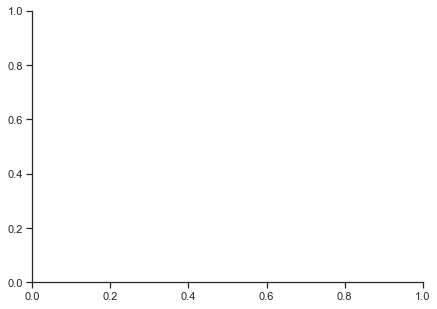

In [70]:

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df_cd8,
    x="# Responding", hue="Predicted CD8+ Epitope",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=1.5,
    bins=10,
    stat=None,
)

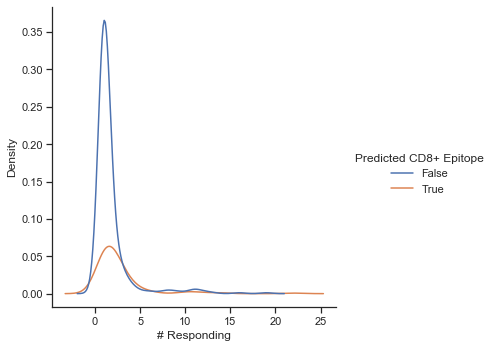

In [66]:
df_cd8_grouped = df_cd8.groupby("Peptide").sum()
df_cd8_grouped["Contains Predicted CD8+ Epitope"] = df_cd8_grouped["Contains Predicted CD8+ Epitope"] > 0
df_cd8_grouped["Predicted CD8+ Epitope"] = df_cd8_grouped["Predicted CD8+ Epitope"] > 0

sns.displot(data=df_cd8_grouped, x="# Responding", hue="Predicted CD8+ Epitope", kind="kde")


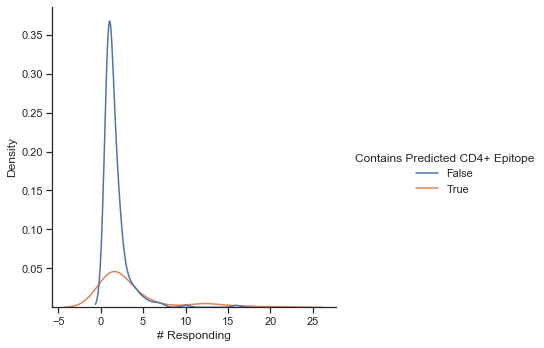

In [67]:
df_cd4_grouped = df_cd4.groupby("Peptide").sum()
df_cd4_grouped["Contains Predicted CD4+ Epitope"] = df_cd8_grouped["Contains Predicted CD4+ Epitope"] > 0
df_cd4_grouped["Predicted C4+ Epitope"] = df_cd8_grouped["Predicted CD4+ Epitope"] > 0

sns.displot(data=df_cd4, x="# Responding", hue="Contains Predicted CD4+ Epitope", kind="kde")
